# Heart Failure Prediction Model

In [430]:
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Dataset

In [ ]:
data = pd.read_csv("heart.csv", encoding="latin-1")

data.info(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing

In [ ]:
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})
data['ChestPainType'] = data['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
data['RestingECG'] = data['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})
data['ST_Slope'] = data['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

X = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = data['HeartDisease']

data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


# Split the Data into Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predicting the Data

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
extracted_X_train = forest.fit(X_train)

tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(extracted_X_train, y_train)

y_pred = model.predict(X_test)

# Conduct Accuracy and Report

In [435]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 88.04
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# Classifying the Data

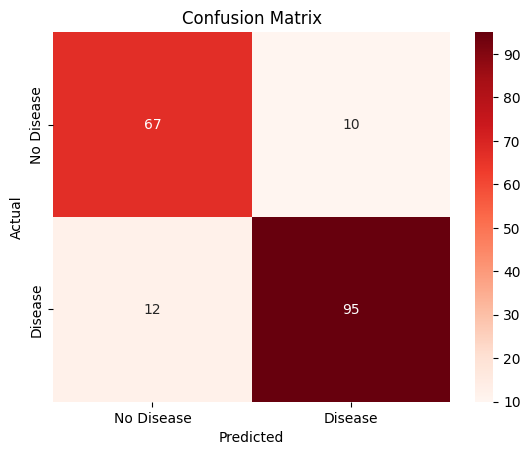

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Testing the Model

In [437]:
columns = ['Age','Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
           'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

#            Sex (F = 1, M = 0)
#  ChestPainType (ATA = 0, NAP = 1, ASY = 2, TA = 3)
#     RestingECG (Normal = 0, ST = 1, LVH = 2)
# ExerciseAngina (N = 0, Y = 1)
#       ST_Slope (Up = 0, Flat = 1, Down = 2)
    
test_data = pd.DataFrame([[49,1,1,160,180,0,0,156,0,1,1]], columns=columns)

prediction = model.predict(test_data)

if prediction == 1:
    print("Prediction: Heart Disease")
else:
    print("Prediction: No Heart Disease")

Prediction: Heart Disease
